<a href="https://colab.research.google.com/github/AlexLeoShin/SeminarGit/blob/main/%D0%9F%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D1%85_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import warnings
# Игнорировать предупреждения
warnings.filterwarnings('ignore')

# Импорт библиотек

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm #загружаем график нормального распределения
import scipy.stats as scs
import statsmodels.stats.diagnostic as sm
import statsmodels.api as sml # для Q-Q plot
from statsmodels import stats as sms
from scipy.stats import shapiro
from scipy.stats import bartlett
from scipy.stats import ttest_1samp
from scipy.stats import ttest_rel

# делаем визуальную настройку графиков
sns.set_theme("notebook")

In [4]:
! pip install scikit-posthocs
import scikit_posthocs as sp

In [5]:
! pip install pingouin
import pingouin as pg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 8.0 MB/s eta 0:00:00


# Введение в проверку статистических гипотез

Проверка статистических гипотез — процедура, которая помогает решить, подтверждают ли данные некоторое утверждение о параметрах генеральной совокупности.

### Нулевая и альтернативная гипотезы

- **Нулевая гипотеза (H₀)** — утверждение, что эффект отсутствует, то есть различий между группами нет.  

- **Альтернативная гипотеза (H₁)** — утверждение, что эффект существует, то есть между группами есть различия.


Предположим, в двух группах исследуется влияние нового препарата, снижающего уровень холестерина. Сформулируем нулевую и альтернативную гипотезы.

- **H₀:** Средний уровень холестерина у пациентов, принимающих препарат, не отличается от уровня у тех, кто получает плацебо.  
- **H₁:** Средний уровень холестерина у пациентов, принимающих препарат, ниже, чем у группы плацебо.






После того как мы сформулировали гипотезы, мы собираем данные и проверяем, насколько полученные результаты типичны для ситуации, когда нулевая гипотеза верна.

1. Если наблюдаемые результаты слишком сильно отклоняются от того, что предсказывает H₀, мы отказываемся от нулевой гипотезы и считаем, что альтернативная гипотеза лучше объясняет данные.
2. Если же данные не дают достаточно оснований для отказа, мы не отвергаем H₀.


### Ошибки первого и второго рода

Два типа ошибок:

- случайность выглядит как эффект (ошибка 1-го рода);

- реальный эффект зашумляется и его сложно заметить (ошибка 2-го рода).


| Тип ошибки | Что означает | Простое пояснение |
|-----------|--------------|-------------------|
| **Ошибка 1-го рода (α)** | Отвергли нулевую гипотезу, хотя она верна | Решили, что эффект есть, хотя его нет |
| **Ошибка 2-го рода (β)** | Не отвергли нулевую гипотезу, хотя она неверна | Не заметили существующий эффект |


- **Ошибка 1-го рода** приводит к ложным открытиям, ложным выводам, неверным решениям.

- **Ошибка 2-го рода** приводит к тому, что мы не замечаем реально существующих явлений и проблем.

### Статистика критерия и критическая область


**Статистика критерия** — число, которое показывает, насколько данные отличаются от того, что предполагает нулевая гипотеза.

- Если отличие маленькое, значит данные выглядят ожидаемыми, нулевая гипотеза может быть правильной.

- Если большое — это означает, что данные выглядят неожидаемо, нулевая гипотеза не объясняет то, что мы видим. Тогда мы склоняемся к тому, что нулевая гипотеза, скорее всего, неверна.

**Критическая область** — диапазон значений, при попадании в который нулевая гипотеза отвергается. То есть это область слишком сильных отклонений.


**Пример**


Врач проверяет, нормальное ли давление у пациента.  
Считается, что нормальные значения давления — это диапазон 120–130 мм рт. ст.

При измерении давления врач получает число — это **статистика критерия**, то есть фактическое наблюдение.

Значения, сильно выходящие за пределы нормального давления — это **критическая область**, слишком большие отклонения, на которые нужно реагировать.

- Давление 124 находится внутри диапазона нормального давления.
- Давление 165 заметно выше нормы. Оно находится в критической области: такое отклонение слишком велико, чтобы считать его случайным.

### Уровень значимости и p-value

- **Уровень значимости (α)** — заранее установленная вероятность ошибки первого рода. Обычно в статистике считают **α = 0.05**.  
- **P-value** — уровень значимости, начиная с которого нулевая гипотеза будет отвергаться. То есть это вероятность при верной нулевой гипотезе получить такие же или более экстремальные значения.



Эти метрики нужны, чтобы считать обнаруженный эффект реальным, а не случайным результатом.  

Уровень значимости задаёт стандарт, по которому решения принимаются по единым правилам.  

Таким образом, уровень значимости и p-value позволяют делать выводы строго и объективно, а не интуитивно.


**Пример**


Исследование проверяет, снижает ли препарат уровень триглицеридов.

После анализа данных получилось p-value = 0.003.


Так как p-value = 0.003 сильно меньше обычного порога 0.05, то можно сделать вывод, что эффект есть, препарат действительно снижает триглицериды.


### Проверка **примерной** нормальности распределения данных

**Свойства нормального распределения**
1. Симметричность
Распределение симметрично относительно своего среднего значения
2. Однозначно определенные параметры
Распределение описывается средним (μ) и стандартным отклонением (σ), которые определяют форму и положение кривой распределения. При работе с нормальным распределением, где среднее значение может быть любым, часто принимается, что стандартное отклонение равно единице.
3. Известные проценты
При анализе данных можно учитывать, что:
* около 68% значений в распределении находятся в пределах одного стандартного отклонения от среднего;
* приблизительно 95% значений распределения находятся в интервале двух стандартных отклонений;
* около 99,7% значений укладываются в пределы трех стандартных отклонений от среднего значения.

In [6]:
from IPython.display import Image

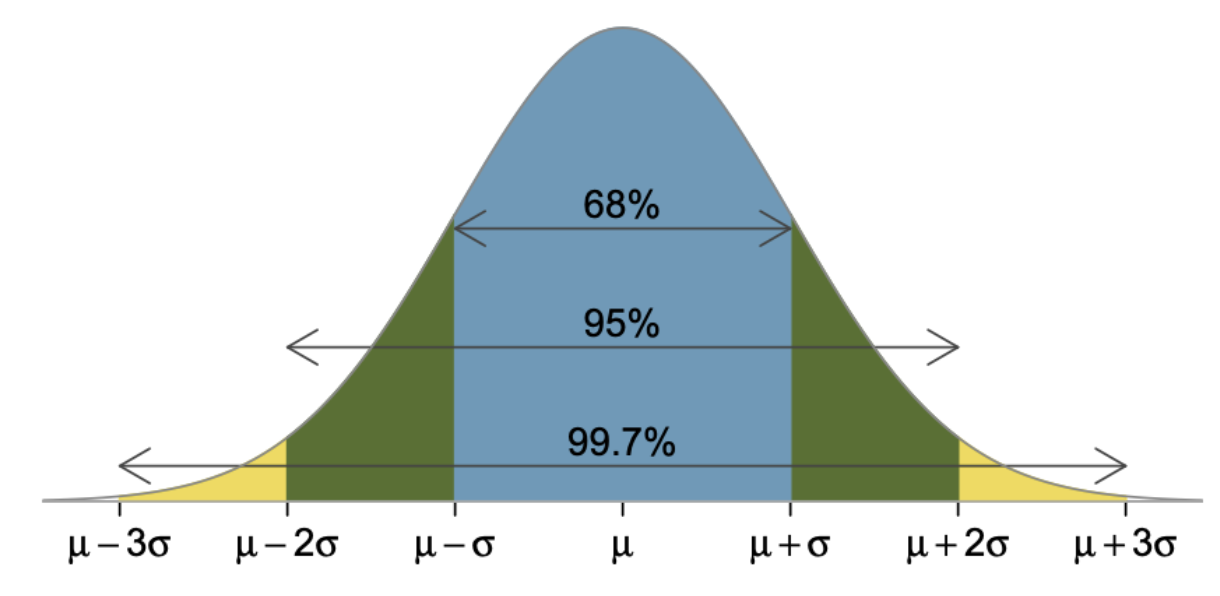

In [7]:
Image('/content/drive/MyDrive/Статистический_анализ_данных/Image2.png', width=600, height=300)

4. Стабильность
Распределение устойчиво к выбросам.
5. Распределение обладает характерной колоколообразной формой
Это указывает на то, что вероятность наблюдения значений близких к среднему значению выше, чем для значений, находящихся дальше от среднего.
6. Равенство среднего, моды и медианы

### Q-Q график

**Q–Q plot** (quantile–quantile plot) — это графический инструмент для проверки того, насколько распределение выборки согласуется с теоретическим распределением (например, нормальным) или с другим набором данных. На оси по одной координате откладываются квантили (percentiles) одной выборки, а по другой — квантили сравниваемого (теоретического или второй выборки). Если распределения совпадают (линейно связаны), точки будут лежать примерно на прямой линии.

**Что показывает Q–Q plot и как делать выводы**

* Что сравнивают


* Ось и интерпретация

* Типичные паттерны отклонений и что они означают


  *  Параллельная прямая, смещённая от y = x: одинаковая форма, но одно распределение сдвинуто (различие в медиане).
   * Наклон, отличный от 1 (точки по-прежнему лежат на прямой, но не под углом 45°): одинаковая форма, но разные масштабы (различие в дисперсии).
   * Вогнутость (точки изгибаются вверх в середине и вниз на концах) означает, что распределения имеют разные хвосты — например, выборка имеет более тяжелые хвосты, чем теоретическое распределение.
  * «S»-образная кривая: если точки отходят в одном направлении на низких квантилях и в противоположном на высоких — это означает отличие в асимметрии (скошенности) или более сложную несовместимость форм.
  * Выбивающиеся точки вдали от общей линии: возможные выбросы в данных.


**Практические шаги при использовании Q–Q plot**


* Постройте Q–Q plot выборки против предполагаемого распределения (например, нормального). Для нормальности часто используют нормальный Q–Q plot.
Визуально оцените, насколько точки следуют прямой. Можно добавить опорную линию (линейная регрессия по точкам) для ориентира.
* Обратите внимание на отклонения в середине (указывают на отличие центральной части), в концах (отличие хвостов) и на отдельные выбросы.
* Используйте вместе с формальными тестами (например, Шапиро–Уилка, Колмогорова–Смирнова) — Q–Q plot даёт визуальную картину и помогает понять природу отклонений, а не только результат p‑value.


**Ограничения**


Q–Q plot — визуальный инструмент; интерпретация частично субъективна.
На малых выборках естественны случайные отклонения; на очень больших выборках небольшие отклонения могут быть статистически значимыми, но практически неважны.
Не даёт численного критерия «насколько много» отличается распределение; для этого нужны метрики или тесты.

**Резюме:** Q–Q plot показывает соответствие квантилей двух распределений. Точки на прямой означают хорошее совпадение; систематические отклонения указывают на различия в смещении, масштабе, асимметрии или хвостах. Используйте его вместе с тестами и внимательной интерпретацией контекста данных.

#ПРАКТИКА

In [8]:
df = pd.read_csv('/content/drive/MyDrive/Статистический_анализ_данных/heart3.csv')

In [9]:
df.head().T

,0,1,2,3,4
Возраст алког,18.000000,90.000000,17.000000,13.000000,16.000000
Работа,1.000000,0.000000,0.000000,1.000000,0.000000
Переломы,0.000000,1.000000,0.000000,0.000000,1.000000
Время пробуждения,6.000000,4.000000,7.000000,7.000000,6.000000
ЛПВП,0.970000,0.740000,1.570000,0.680000,1.010000
Выход на пенсию,0.000000,0.000000,0.000000,0.000000,0.000000
Холестерин,4.000000,8.600000,5.200000,4.900000,8.200000
Артериальная гипертония,0.000000,0.000000,0.000000,1.000000,1.000000
Триглицериды,0.520000,2.730000,1.020000,3.250000,1.250000
Гепатит,0.000000,0.000000,0.000000,0.000000,1.000000


In [10]:
np.random.seed(0)

df.loc[df['Пол'] == 0, 'Рост'] = np.round(np.random.normal(172, 7, size=(df['Пол'] == 0).sum()))
df.loc[df['Пол'] == 1, 'Рост'] = np.round(np.random.normal(165, 6, size=(df['Пол'] == 1).sum()))

df['Вес'] = np.round(df['Индекс массы тела, кг/м^2'] * (df['Рост'] / 100)**2)

In [11]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,939,940,941,942,943,944,945,946,947,948
Возраст алког,18.000000,90.000000,17.000000,13.000000,16.000000,35.000000,90.000000,12.000000,17.000000,18.000000,...,90.000000,90.000000,18.000000,17.000000,25.000000,18.000000,26.000000,20.000000,21.000000,17.000000
Работа,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
Переломы,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
Время пробуждения,6.000000,4.000000,7.000000,7.000000,6.000000,6.000000,5.000000,6.000000,7.000000,8.000000,...,7.000000,8.000000,6.000000,6.000000,8.000000,6.000000,7.000000,8.000000,8.000000,5.000000
ЛПВП,0.970000,0.740000,1.570000,0.680000,1.010000,1.470000,1.540000,0.570000,0.610000,1.430000,...,1.280000,1.180000,1.090000,1.430000,0.600000,0.900000,1.240000,1.010000,1.740000,0.820000
Выход на пенсию,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Холестерин,4.000000,8.600000,5.200000,4.900000,8.200000,4.000000,3.900000,7.800000,6.500000,4.300000,...,8.100000,5.600000,9.000000,5.100000,6.300000,4.600000,4.300000,5.900000,4.600000,4.900000
Артериальная гипертония,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Триглицериды,0.520000,2.730000,1.020000,3.250000,1.250000,0.900000,1.130000,4.090000,5.230000,0.500000,...,1.180000,1.320000,2.250000,1.380000,5.530000,0.750000,0.570000,3.540000,0.630000,1.200000
Гепатит,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


## Проверка распределения на нормальность (**примерно** нормальное распределение)

* Узнать имеют ли примерно нормальное распределение переменные `Холестерин` и `Рост`

Признак рост рассмотрите ещё и отдельно: для мужчин и для женщин

### Проверка распределения на нормальность с помощью визуализации

* Сравнение с идеальным нормальным распределением

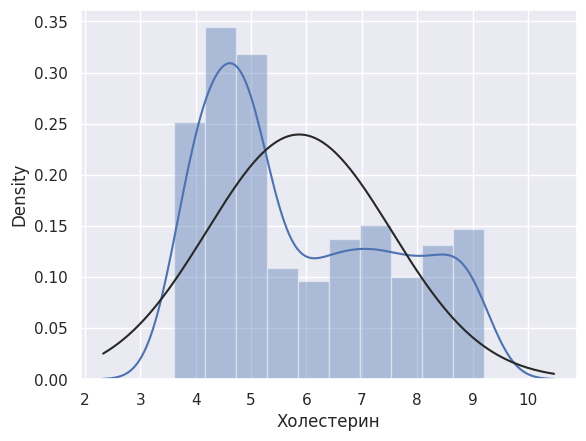

In [12]:
sns.distplot(df['Холестерин'], fit=norm); # fit=norm - позволяет посмотреть идеальное нормальное распределение переменной

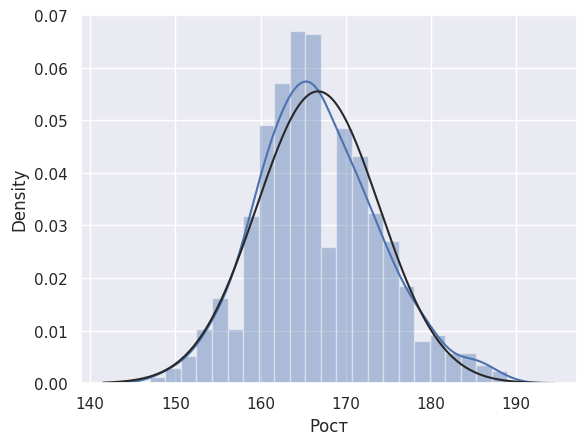

In [15]:
sns.distplot(df['Рост'], fit=norm);

**Вывод:** распределение переменной Рост по графику примерно нормальное

* Посмотрим распределение роста отдельно для мужчин и для женщин

In [16]:
df_women = df[df['Пол'] == 1]

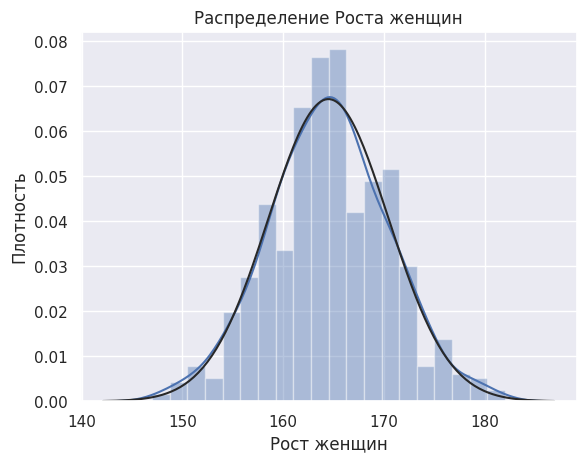

In [17]:
sns.distplot(df_women['Рост'], fit=norm)
plt.xlabel('Рост женщин')
plt.ylabel('Плотность')
plt.title('Распределение Роста женщин')
plt.show();

**Вывод:** распределение переменной Рост по графику примерно нормальное

* Выполните для мужчин самостоятельно

In [18]:
df_men = df[df['Пол'] == 0]

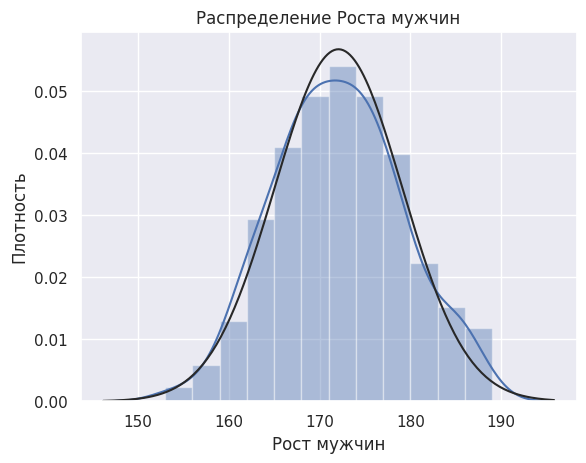

In [19]:
sns.distplot(df_men['Рост'], fit=norm)
plt.xlabel('Рост мужчин')
plt.ylabel('Плотность')
plt.title('Распределение Роста мужчин')
plt.show();

**Вывод:** распределение переменной Рост по графику примерно нормальное

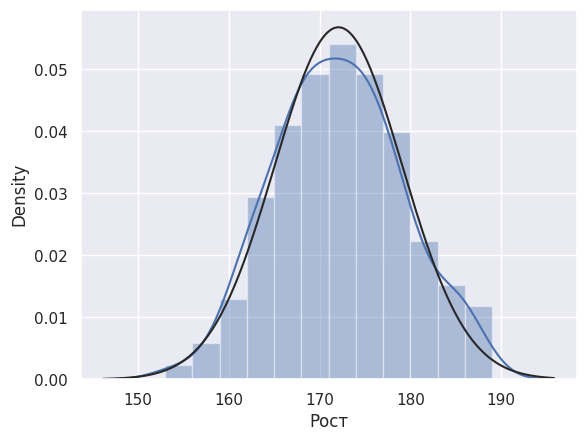

In [20]:
sns.distplot(df_men['Рост'], fit=norm); # ПОВТОР УЧИТЕЛЯ из лекционного материала для визуализации

**Вывод:** распределение переменной Рост по графику примерно нормальное

* Q-Q график

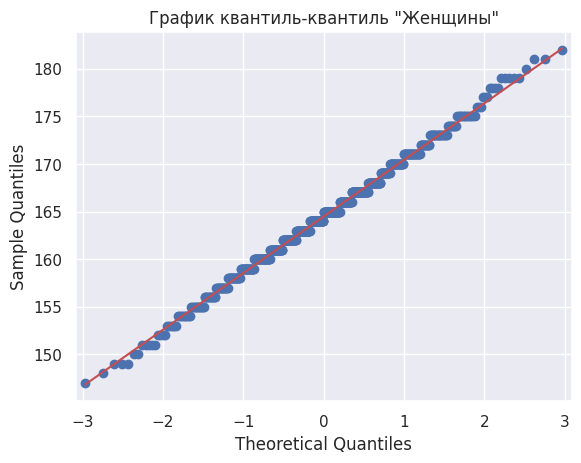

In [27]:
sml.qqplot(df_women['Рост'], line='s')
plt.title('График квантиль-квантиль "Женщины"')
plt.show()

**Вывод:** распределение переменной Рост для женщин по графику примерно нормальное

* Нарисуйте график Q-Q для мужчин

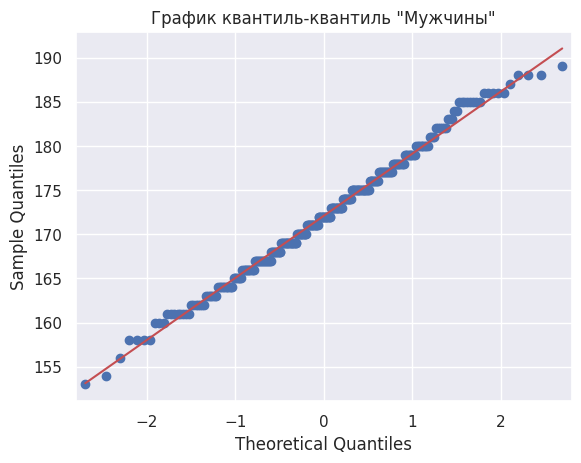

In [28]:
sml.qqplot(df_men['Рост'], line='s')
plt.title('График квантиль-квантиль "Мужчины"')
plt.show()

**Вывод:** распределение переменной Рост для мужчин по графику примерно нормальное

***График Q-Q для переменной РОСТ***

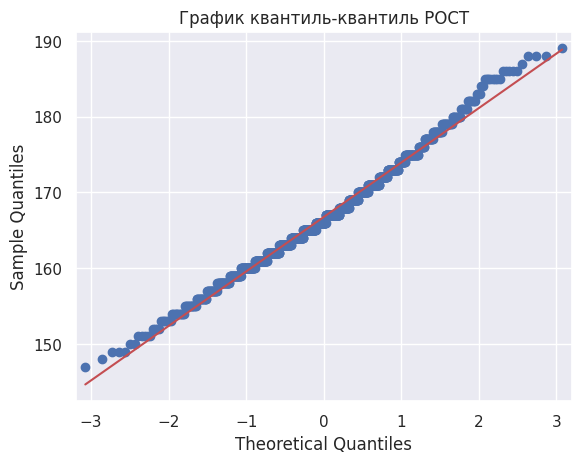

In [44]:
sml.qqplot(df['Рост'], line='s')
plt.title('График квантиль-квантиль РОСТ')
plt.show()

**Вывод:** распределение переменной **РОСТ** по графику примерно нормальное (***наблюдаем на визуализации - примерно нормальное распределение***)

ТЕСТИРУЕМ: Проверка распределения переменной Холестерин **Q-Q plot график**

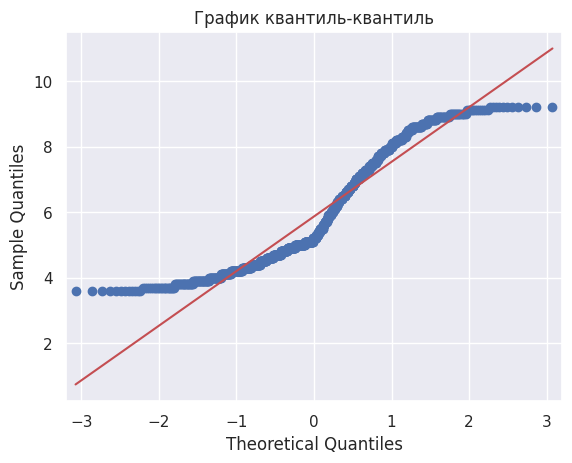

In [32]:
sml.qqplot(df['Холестерин'], line='s')
plt.title('График квантиль-квантиль')
plt.show()

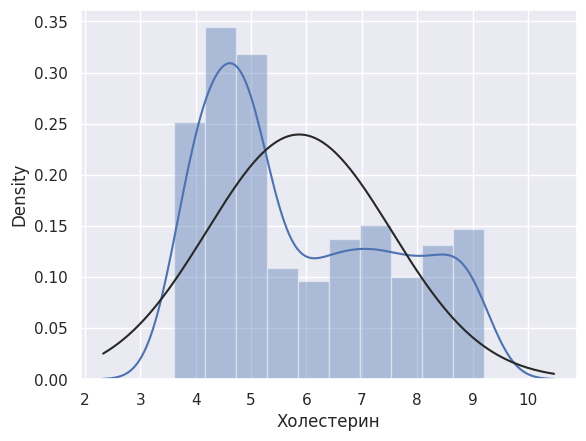

In [33]:
sns.distplot(df['Холестерин'], fit=norm);

**Вывод:** распределение переменной Холестерин по графику ***является ненормальным*** (далеко от примерно нормального распределения)

* Нарисуйте оба графика переменной РОСТ на одной строке для женщин и мужчин

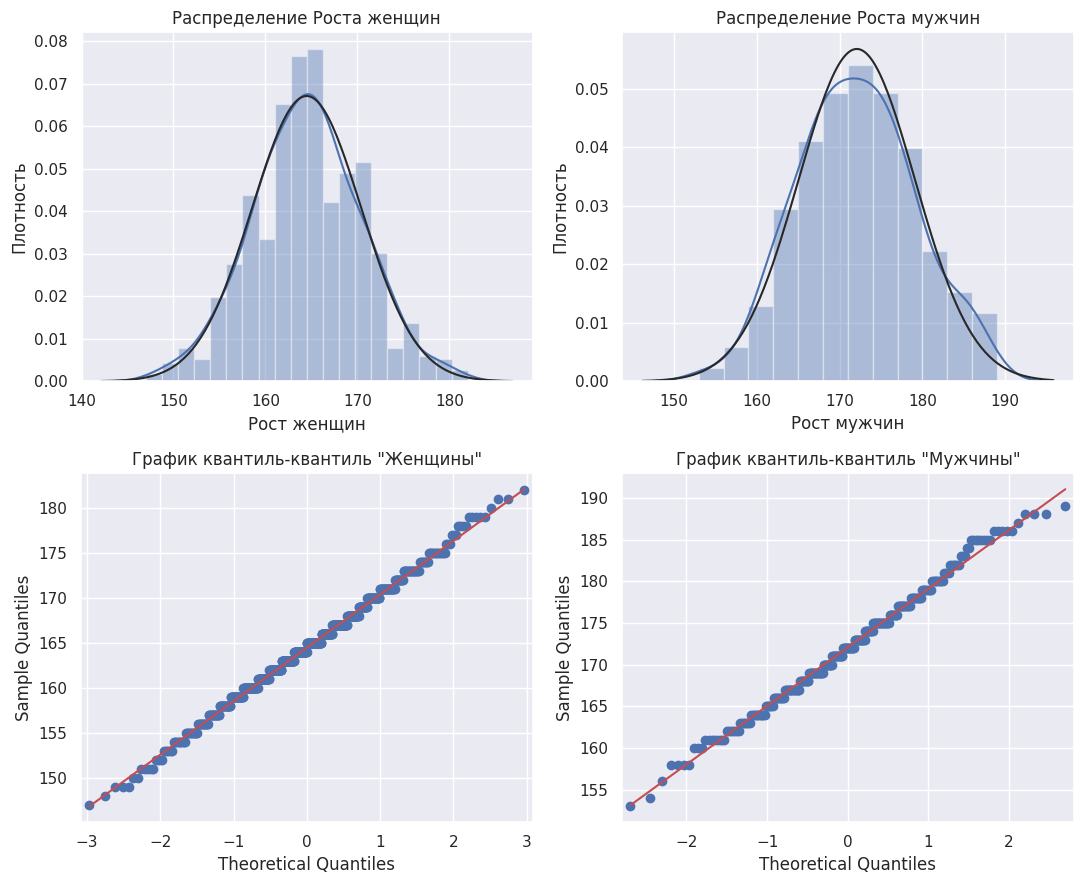

In [48]:

fig, axes = plt.subplots(2, 2, figsize=(11, 9))# Создаем фигуру с 2 строками и 2 столбцами

# Распределение роста женщин (левый верхний)
sns.distplot(df_women['Рост'], fit=norm, ax=axes[0, 0])
axes[0, 0].set_xlabel('Рост женщин')
axes[0, 0].set_ylabel('Плотность')
axes[0, 0].set_title('Распределение Роста женщин')

# Распределение роста мужчин (правый верхний)
sns.distplot(df_men['Рост'], fit=norm, ax=axes[0, 1])
axes[0, 1].set_xlabel('Рост мужчин')
axes[0, 1].set_ylabel('Плотность')
axes[0, 1].set_title('Распределение Роста мужчин')

# Q-Q plot для женщин (левый нижний)
sml.qqplot(df_women['Рост'], line='s', ax=axes[1, 0])
axes[1, 0].set_title('График квантиль-квантиль "Женщины"')

# Q-Q plot для мужчин (правый нижний)
sml.qqplot(df_men['Рост'], line='s', ax=axes[1, 1])
axes[1, 1].set_title('График квантиль-квантиль "Мужчины"')


plt.tight_layout()# Авто настройка расстояний между графиками
plt.show()# Отображаем все графики

**Вывод:** распределение переменной Рост для женщин и мужчин по графикам примерно нормальное

### Проверка распределения на нормальность с помощью тестов

#### **Тест Шапиро-Уилка**

In [49]:
# Проведение теста Шапиро-Уилка для проверки на нормальность данных
statistic, p_value = shapiro(df['Холестерин'])

# Вывод результатов
print("Значение статистики теста Шапиро-Уилка:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Данные распределены примерно нормально")
else:
    print("Данные НЕ распределены нормально")

Значение статистики теста Шапиро-Уилка: 0.9094967031162705
p-value: 2.6323708532997027e-23
Данные НЕ распределены нормально


In [50]:
# Проведение теста Шапиро-Уилка для проверки на нормальность данных
statistic, p_value = shapiro(df['Рост']) # ДОПИШИТЕ КОД для переменой Рост

# Вывод результатов
print("Значение статистики теста Шапиро-Уилка:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Данные распределены примерно нормально")
else:
    print("Данные НЕ распределены нормально")

Значение статистики теста Шапиро-Уилка: 0.9910512305837252
p-value: 1.6006678822286548e-05
Данные НЕ распределены нормально


* Распределения признака `Рост`по полу (отдельно для мужчин и женщин)

In [51]:
# Проведение теста Шапиро-Уилка для проверки на нормальность данных
statistic, p_value = shapiro(df_women['Рост']) # ДОПИШИТЕ КОД Рост женщин

# Вывод результатов
print("Значение статистики теста Шапиро-Уилка:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Данные распределены примерно нормально")
else:
    print("Данные НЕ распределены нормально")

Значение статистики теста Шапиро-Уилка: 0.996312190895843
p-value: 0.12463354943314353
Данные распределены примерно нормально


In [52]:
# Проведение теста Шапиро-Уилка для проверки на нормальность данных
statistic, p_value = shapiro(df_men['Рост'])# ДОПИШИТЕ КОД Рост мужчин

# Вывод результатов
print("Значение статистики теста Шапиро-Уилка:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Данные распределены примерно нормально")
else:
    print("Данные НЕ распределены нормально")

Значение статистики теста Шапиро-Уилка: 0.9927863785360644
p-value: 0.1860755704480886
Данные распределены примерно нормально


**Выводы по переменной "Холестерин":** для переменной Холестерин тест Шапиро-Уилка показал, что распределение **ненормальное**

**Выводы по переменной "Рост":** для переменной Холестерин тест Шапиро-Уилка показал, что распределение **ненормальное**

**Вывод:** для переменных **Рост для женщин и Рост для мужчин** тест Шапиро-Уилка показал, что распределения **примерно нормальные**

#### **Тест Колмагорова-Смирнова**

In [53]:
# Проведение теста Колмагорова-Смирнова для проверки на нормальность данных
statistic, p_value = scs.kstest(df['Рост'], 'norm')

# Вывод результатов
print("Значение статистики теста Колмагорова-Смирнова:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Данные распределены примерно нормально")
else:
    print("Данные НЕ распределены нормально")

Значение статистики теста Колмагорова-Смирнова: 1.0
p-value: 0.0
Данные НЕ распределены нормально


In [54]:
# Проведение теста Колмагорова-Смирнова для проверки на нормальность данных
statistic, p_value = scs.kstest(df['Холестерин'], 'norm') # ДОПИШИТЕ КОД Холестерин

# Вывод результатов
print("Значение статистики теста Колмагорова-Смирнова:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Данные распределены примерно нормально")
else:
    print("Данные НЕ распределены нормально")

Значение статистики теста Колмагорова-Смирнова: 0.9998408914098424
p-value: 0.0
Данные НЕ распределены нормально


In [55]:
# Проведение теста Колмагорова-Смирнова для проверки на нормальность данных для женщин
statistic, p_value = stats.kstest(df_women['Рост'], 'norm') # ДОПИШИТЕ КОД Рост для женщин

# Вывод результатов
print("Значение статистики теста Колмагорова-Смирнова:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Данные распределены примерно нормально")
else:
    print("Данные НЕ распределены нормально")

Значение статистики теста Колмагорова-Смирнова: 1.0
p-value: 0.0
Данные НЕ распределены нормально


In [56]:
# Проведение теста Колмагорова-Смирнова для проверки на нормальность данных
statistic, p_value = scs.kstest(df_men['Рост'], 'norm') # ДОПИШИТЕ КОД Рост для мужчин

# Вывод результатов
print("Значение статистики теста Колмагорова-Смирнова:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Данные распределены примерно нормально")
else:
    print("Данные НЕ распределены нормально")

Значение статистики теста Колмагорова-Смирнова: 1.0
p-value: 0.0
Данные НЕ распределены нормально


**Вывод:** тест **Колмагорова-Смирнова** для переменных *Рост для женщин и Рост для мужчин* противоречит тесту Шапиро-Уилка и показал, что **распределения  ненормальные**

Когда критерии Шапиро–Уилка (ШУ) и Колмогоров–Смирнова (КС) дают противоречивые результаты, важно учитывать их свойства и контекст, чтобы понять, какой результат более надёжен в вашей ситуации.

Для небольших и средних выборок доверьтесь Шапиро–Уилку. Если ШУ не отвергает нормальность, а КС — отвергает, вероятно, КС «перехватывает» несущественные расхождения или используется некорректно (без учёта оценки параметров).

Проверьте, корректно ли применён КС: были ли параметры нормального распределения заранее заданы или оценены по данным?

Если параметры оценены, используйте Lilliefors тест или адаптированный вариант.

Всегда смотрите диагностические графики: Q–Q plot, гистограмму, плотность — они дают интуитивную картину, где именно отклонение.

Учитывайте цель анализа: многие статистические методы устойчивы к умеренным отклонениям от нормальности; возможно, вместо строгой проверки нормальности лучше применять робастные тесты или непараметрические методы.

#### **Тест Лилиефорса**

In [57]:
# Проведение теста Лилиефорса для проверки на нормальность данных
statistic, p_value = sm.lilliefors(df['Рост'])

# Вывод результатов
print("Значение статистики теста Лилиефорса:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Данные распределены примерно нормально")
else:
    print("Данные НЕ распределены нормально")

Значение статистики теста Лилиефорса: 0.06611385598893915
p-value: 0.0009999999999998899
Данные НЕ распределены нормально


In [60]:
# Проведение теста Лилиефорса для проверки на нормальность данных
statistic, p_value = sm.lilliefors(df_women['Рост']) # ДОПИШИТЕ КОД Рост для женщин

# Вывод результатов
print("Значение статистики теста Лилиефорса:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Данные распределены примерно нормально")
else:
    print("Данные НЕ распределены нормально")

Значение статистики теста Лилиефорса: 0.04583837169867766
p-value: 0.003538151679618494
Данные НЕ распределены нормально


In [61]:
# Проведение теста Лилиефорса для проверки на нормальность данных
statistic, p_value = sm.lilliefors(df_men['Рост']) # ДОПИШИТЕ КОД Рост для мужчин

# Вывод результатов
print("Значение статистики теста Лилиефорса:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Данные распределены примерно нормально")
else:
    print("Данные НЕ распределены нормально")

Значение статистики теста Лилиефорса: 0.04962782320671194
p-value: 0.13269776698491237
Данные распределены примерно нормально


**Выводы:** для переменных "Рост" и "Рост для женщин: тест Лилиефорса показал, что ***распределение ненормальное*** (данные НЕ распределены нормально)

**Вывод:** для переменной **Рост для мужчин** тест Лилиефорса показал, что ***распределения примерно нормальные*** (Данные распределены примерно нормально)


## Проверка гомогенности дисперсии

**Однородность (гомогенность) дисперсий** — это свойство данных, при котором разброс (вариабельность) наблюдений в разных группах или при разных значениях предиктора примерно одинаков.

**Почему это важно**

Многие статистические методы (t‑тесты, ANOVA, обычный МНК‑регрессионный анализ) предполагают, что вариации в разных группах одинаковы. Если это предположение нарушено (есть гетероскедастичность), то стандартные оценки ошибок и тесты значимости могут быть неправильными: p‑значения станут ненадёжными, интервалы — либо уже, либо шире, чем надо.

**Как заметить на практике:**

**Визуально:** построить график остатков или ящиков с усами (boxplot) по группам. Если длины “усов” и ширины коробок сильно различаются, вероятно, дисперсии разные. Статистически: существуют тесты (Levene, Bartlett, Fligner и т. д.), которые проверяют это формально.

### Тест Бартлетта

In [62]:
# Проведение теста Бартлета для проверки на нормальность данных
statistic, p_value = scs.bartlett(df_men['Рост'],df['Индекс массы тела, кг/м^2'])

# Вывод результатов
print("Значение статистики теста Бартлета:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Дисперсии однородные")
else:
    print("Дисперсии НЕ однородные")

Значение статистики теста Бартлета: 70.13806503567224
p-value: 5.529558481669449e-17
Дисперсии НЕ однородные


## Тест Levene

In [65]:
from scipy.stats import levene

# Проведение теста Левене для проверки на однородность дисперсий
statistic, p_value = levene(df_men['Рост'], df['Индекс массы тела, кг/м^2'])

# Вывод результатов
print("Значение статистики теста Левене:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Дисперсии однородные")
else:
    print("Дисперсии НЕ однородные")

Значение статистики теста Левене: 53.85055435140592
p-value: 3.9164355355619735e-13
Дисперсии НЕ однородные


**Выводы:** Тест Бартлетта и Тест Levene на проверку однородности дисперсий между переменными **Рост для мужчин и Индекс массы тела, кг/м^2** показали,  что дисперсии переменных Рост для мужчин и Индекс массы тела, кг/м^2 ***не являются однородными.***

# ПАРАМЕТРИЧЕСКИЕ ТЕСТЫ

Параметрические методы используют предположение о нормальности распределения данных внутри групп.  
Они более чувствительные, если предположения выполняются.

## t-критерий Стьюдента

### 1)Одновыборочный t-тест

**Задача**. Исследователь измерил уровень концентрации глюкозы в крови у группы испытуемых и получил следующие значения: 95, 100, 105, 110, 115, 120, 125 мг/дл. Известно, что средний уровень концентрации глюкозы в популяции здоровых взрослых составляет 100 мг/дл. Требуется определить, значимо ли отличается средний уровень концентрации глюкозы в данной группе испытуемых от нормы.

Для решения этой задачи можно применить одновыборочный t-тест для проверки гипотезы о равенстве средних значений уровня глюкозы в группе испытуемых и в популяции здоровых взрослых.

## **Гипотеза:**

**Но** - Средний уровень концентрации глюкозы в группе испытуемых не значимо отличается от нормы (от 100 ед.), (статистически незначим)


**Н1** - Средний уровень концентрации глюкозы в группе испытуемых значимо отличается от нормы

In [63]:
# Уровень концентрации глюкозы в крови у испытуемых
glucose_levels = np.array([95, 100, 105, 110, 115, 120, 125])

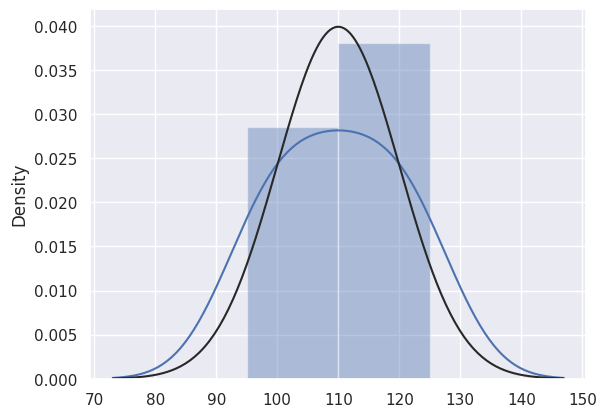

In [64]:
# посмотрим как выглядит распределение переменной концентрации глюкозы в крови в сравнении с графиком нормального распределения
sns.distplot(glucose_levels , fit=norm);

Вывод: распределение примерно нормальное

In [66]:
# Проведение теста Шапиро-Уилка для проверки на нормальность данных
statistic, p_value = shapiro(glucose_levels)

# Вывод результатов
print("Значение статистики теста Шапиро-Уилка:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Данные распределены нормально")
else:
    print("Данные НЕ распределены нормально")

Значение статистики теста Шапиро-Уилка: 0.9780016294384769
p-value: 0.9492885624975852
Данные распределены нормально


Используем функцию **ttest_1samp()** из библиотеки **scipy.stats** для выполнения **одновыборочного t-теста**

In [67]:
# Средний уровень концентрации глюкозы в популяции здоровых взрослых
population_mean = 100

# Выполнение одновыборочного t-теста
t_statistic, p_value = ttest_1samp(glucose_levels, population_mean)

print(f"Значение t-статистики: {t_statistic}")
print(f"Значение p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Средний уровень концентрации глюкозы в группе испытуемых значимо отличается от нормы")
else:
    print("Средний уровень концентрации глюкозы в группе испытуемых не значимо отличается от нормы")

Значение t-статистики: 2.449489742783178
Значение p-value: 0.04982526278057675
Средний уровень концентрации глюкозы в группе испытуемых значимо отличается от нормы


In [68]:
# Второй способ с использованием бибиотеки pengouin
pg.ttest(glucose_levels, y=100)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.44949,6,two-sided,0.049825,"[100.01, 119.99]",0.92582,1.99,0.53734


# ЗАДАНИЕ

* Постройте гипотезу о том имеет ли статистически значимые отличия рост мужчин от стандартного роста в 174 см и проверьте её двумя способами

**Для примерно нормального распределенния** можно использовать  функцию ttest_1samp() из библиотеки scipy.stats для выполнения одновыборочного t-теста, а это у нас Рост для мужчин

In [82]:
standart_men = 174

# Выполнение одновыборочного t-теста
t_statistic, p_value = ttest_1samp(df_men['Рост'], standart_men)

print(f"Значение t-статистики: {t_statistic}")
print(f"Значение p-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Средний рост мужчин в группе испытуемых значимо отличается от стандартного роста в 174 см")
else:
    print("Средний рост мужчин в группе испытуемых НЕ значимо отличается от стандартного роста в 174 см")

Значение t-статистики: -4.584959511362684
Значение p-value: 6.823357508905074e-06
Средний рост мужчин в группе испытуемых значимо отличается от стандартного роста в 174 см


In [81]:
# Второй способ с использованием бибиотеки pengouin
pg.ttest(df_men['Рост'], y=174)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,0.202278,283,two-sided,0.839845,"[171.26, 172.91]",0.012003,0.068,0.054668




**Выводы:** t-критерий Стьюдента (Одновыборочный t-тест) для переменной Рост мужчины (для 174 см) показал, что средний рост мужчин в группе испытуемых **значимо отличается от стандартного роста в 174 см**.

***Какой рост необходимо рассматривать как средний рост мужчин?**

Фактически стандартный рост видим во втором тесте с использованием бибиотеки pengouin находится в интервале [171.26, 172.91] и в этом случае средний рост мужчин в группе испытуемых **НЕ значимо отличается от стандартного роста в 172 см**

## Сравнение двух и более групп


При анализе данных часто требуется сравнить значения числового показателя между двумя или более группами.  
Например: отличается ли уровень глюкозы у людей с диабетом и без него?  


## 2)t-тест Стьюдента для независимых выборок

**Когда используется:**
- когда нужно сравнить **две группы**;
- признак — **числовой** (например, глюкоза, холестерин);
- данные в группах приблизительно **нормально распределены** (или n ≥ 30).

**Зачем нужен:**
Чтобы понять, отличается ли среднее значение показателя между двумя независимыми группами.

**На что отвечает тест:**
> “Есть ли статистически значимое различие между средними значениями в двух группах?”


### **Пример 1**
Проводится исследование эффективности двух различных лекарственных препаратов для снижения кровяного давления у пациентов с гипертонией. У пациентов случайным образом разделяют на две группы: одной группе дают препарат А, а другой - препарат В. После определенного периода лечения измеряют уровень кровяного давления у пациентов из каждой группы.

Данные для 15 пациентов в каждой из двух групп:

Группа А (препарат A):
98, 102, 105, 110, 100, 95, 108, 112, 107, 99, 101, 104, 113, 96, 106

Группа B (препарат B):
100, 98, 103, 108, 107, 99, 110, 105, 112, 96, 101, 115, 94, 106, 113

Эти данные представляют уровень кровяного давления после лечения каждого пациента в каждой из групп.

Задача состоит в том, чтобы проверить, есть ли статистически значимая разница в средних уровнях кровяного давления у пациентов, принимавших препарат А, и у пациентов, принимавших препарат В. Для этого проводится двухвыборочный t-тест, который позволит определить, есть ли значимое различие между эффективностью двух лекарственных препаратов в снижении кровяного давления.

**Гипотеза**

**Но** - Средний уровень кровяного давления у пациентов, принимавших препарат А, **НЕ отличается** от среднего уровня кровяного давления у пациентов, принимавших препарат В.

**Н1** - Средний уровень кровяного давления у пациентов, принимавших препарат А, статистически отличается от среднего уровня кровяного давления у пациентов, принимавших препарат В.

In [83]:
# Данные для двух НЕЗАВИСИМЫХ групп (загружаем данные)
group_A = [98, 102, 105, 110, 100, 95, 108, 112, 107, 99, 101, 104, 113, 96, 106]
group_B = [100, 98, 103, 108, 107, 99, 110, 105, 112, 96, 101, 115, 94, 106, 113]

**Проверка на нормальность**

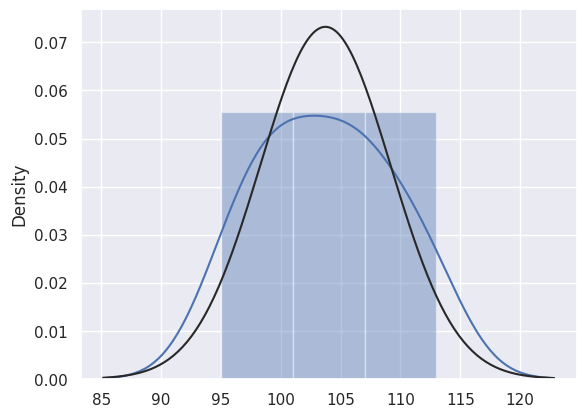

In [84]:
# посмотрим как выглядит распределение уровня кровяного давления у пациентов,
#принимавших препарат А, сравним с нормальным распределением
sns.distplot(group_A , fit=norm);

**Вывод:** распределение примерно нормальное

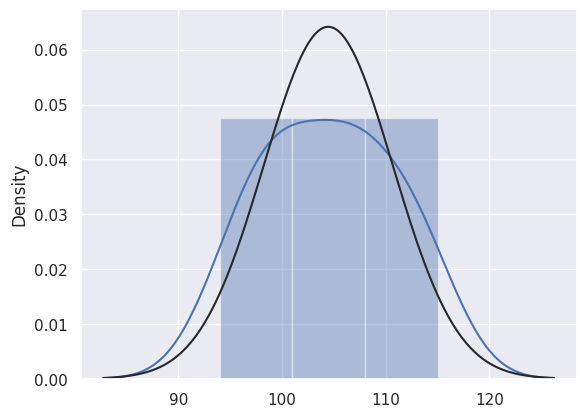

In [85]:
# посмотрим как выглядит распределение уровня кровяного давления у пациентов,
#принимавших препарат B, сравним с нормальным распределением
sns.distplot(group_B , fit=norm);

**Вывод:** распределение примерно нормальное

**Тест Шапиро-Уилка**

In [86]:
# Проведение теста Шапиро-Уилка для проверки на нормальность данных
statistic, p_value = shapiro(group_A)

# Вывод результатов
print("Значение статистики теста Шапиро-Уилка:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Данные из группы A распределены нормально")
else:
    print("Данные из группы A НЕ распределены нормально")


Значение статистики теста Шапиро-Уилка: 0.9688448534775187
p-value: 0.8405930357458609
Данные из группы A распределены нормально


In [87]:
# Проведение теста Шапиро-Уилка для проверки на нормальность данных
statistic, p_value = shapiro(group_B)

# Вывод результатов
print("Значение статистики теста Шапиро-Уилка:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Данные из группы B распределены нормально")
else:
    print("Данные из группы B НЕ распределены нормально")


Значение статистики теста Шапиро-Уилка: 0.9717719743466039
p-value: 0.8833758344812677
Данные из группы B распределены нормально


**Проверка на гомогенность дисперсий**

In [88]:
# Проведение теста Бартлетта на гомогенность дисперсий
statistic, p_value = bartlett(group_A, group_B)

# Вывод результатов
print("Значение статистики теста Бартлетта:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Дисперсии переменных group_A и group_B считаются гомогенными")
else:
    print("Дисперсии переменных group_A и group_B НЕ считаются гомогенными")


Значение статистики теста Бартлетта: 0.7261917423694962
p-value: 0.3941203850694731
Дисперсии переменных group_A и group_B считаются гомогенными


**Двухвыборочный t-тест**

Используем функцию **ttest_ind()** из библиотеки **scipy.stats** для выполнения **двухвыборочного t-теста**

In [89]:
# Выполнение двухвыборочного t-теста
t_statistic, p_value = stats.ttest_ind(group_A, group_B)

# Вывод результатов
print("Значение t-статистики:", t_statistic)
print("Значение p-value:", p_value)

if p_value < 0.05:
    print("Различия между группами статистически значимы")
else:
    print("Статистически значимых различий между группами не выявлено")

Значение t-статистики: -0.3319859996577727
Значение p-value: 0.7423722256189611
Статистически значимых различий между группами не выявлено


**Выводы:**
1. Проверка **на нормальность** -  **Тест Шапиро-Уилка** для обеих групп показал, что Препарат А и Препарат В: p-значения были значительно больше 0.05 (0.84 и 0.88 соответственно).

Это означает, что **данные в обеих группах распределены нормально.**


2. Проверка **на гомогенность дисперсий (Тест Бартлетта)**: р-значение (0.394) также было больше 0.05.

Это указывает на то, что дисперсии в группах Препарат А и Препарат В **являются однородными.**

3. Двухвыборочный t-тест: р-значение, полученное в результате t-теста, составило 0.742, что значительно больше уровня значимости 0.05.

**Статистически значимых различий между группами не выявлено.**

**Заключение:** Поскольку p-значение t-теста значительно превышает уровень значимости (0.05), **нет оснований отвергать нулевую гипотезу.**

**Но гипотеза подтверждена** -  статистически значимых различий в средних уровнях кровяного давления между пациентами, принимавшими препарат А, и пациентами, принимавшими препарат В, **НЕ выявлено.**

*Оба препарата показывают одинаковую эффективность в снижении кровяного давления на основе этих данных.*

### Пример 2

Сравнение уровня глюкозы у людей **с диабетом и без него**:

In [90]:
g0 = df.loc[df['Сахарный диабет'] == 0, 'Глюкоза плазмы натощак'].dropna().values
g1 = df.loc[df['Сахарный диабет'] == 1, 'Глюкоза плазмы натощак'].dropna().values

# Выполнение двухвыборочного t-теста
t_statistic, p_value = stats.ttest_ind(g0, g1, equal_var=False, nan_policy='omit')

# Вывод результатов
print("Значение t-статистики:", t_statistic)
print("Значение p-value:", p_value)

if p_value < 0.05:
    print("Различия между группами статистически значимы")
else:
    print("Статистически значимых различий между группами не выявлено")

Значение t-статистики: -2.0306901809841458
Значение p-value: 0.04446095159700985
Различия между группами статистически значимы


**Вывод**: уровень глюкозы у людей с сахарным диабетом статистически значимо отличается от значений людей без подобных патологий.

# ЗАДАНИЯ

*Задание: проведите t-тест Стюдента и сделайте выводы о статистически значимости отличий значений холестерина (`Холестерин`) у людей без артериальной гипертонии и с ней (`df['Артериальная гипертония'] == 0` и `df['Артериальная гипертония'] == 1)`.*

**Гипотеза**

**Но** - Средние значения уровня холестерина у людей без артериальной гипертонии и с ней **НЕ имеют** статистически значимых различий.

**Н1** - Средние значения уровня холестерина у людей без артериальной гипертонии и с ней **имеют** статистически значимые различия.

In [91]:
g0 = df.loc[df['Артериальная гипертония'] == 0, 'Холестерин'].dropna().values
g1 = df.loc[df['Артериальная гипертония'] == 1, 'Холестерин'].dropna().values

# Выполнение двухвыборочного t-теста
t_statistic, p_value = stats.ttest_ind(g0, g1, equal_var=False, nan_policy='omit')

# Вывод результатов
print("Значение t-статистики:", t_statistic)
print("Значение p-value:", p_value)

if p_value < 0.05:
    print("Различия между группами статистически значимы")
else:
    print("Статистически значимых различий между группами не выявлено")

Значение t-статистики: -32.805775197401516
Значение p-value: 3.3348306161306414e-154
Различия между группами статистически значимы


**Выводы:** Значение p-value (приблизительно 3.33e-154) крайне мало и значительно меньше стандартного уровня значимости alpha = 0.05. Это означает, что **мы отвергаем нулевую гипотезу**.

Таким образом, **существуют статистически значимые основания** утверждать, что средние значения уровня холестерина у людей без артериальной гипертонии и с ней **имеют существенные различия**.

*Задание: проведите t-тест Стюдента и сделайте выводы о статистически значимости отличий значений триглицеридов (`Триглицериды`) у людей без артериальной гипертонии и с ней (`df['Артериальная гипертония'] == 0` и `df['Артериальная гипертония'] == 1)`*

**Гипотеза**

**Но** - Средние значения уровня триглицеридов у людей без артериальной гипертонии и с ней **НЕ имеют** статистически значимых различий.

**Н1** - Средние значения уровня триглицеридов у людей без артериальной гипертонии и с ней **имеют** статистически значимые различия.

In [92]:
g0 = df.loc[df['Артериальная гипертония'] == 0, 'Триглицериды'].dropna().values
g1 = df.loc[df['Артериальная гипертония'] == 1, 'Триглицериды'].dropna().values

# Выполнение двухвыборочного t-теста
t_statistic, p_value = stats.ttest_ind(g0, g1, equal_var=False, nan_policy='omit')

# Вывод результатов
print("Значение t-статистики:", t_statistic)
print("Значение p-value:", p_value)

if p_value < 0.05:
    print("Различия между группами статистически значимы")
else:
    print("Статистически значимых различий между группами не выявлено")

Значение t-статистики: -20.359576600904624
Значение p-value: 3.756811195868994e-71
Различия между группами статистически значимы


**Выводы:** начение p-value (приблизительно 3.76e-71) чрезвычайно мало и значительно меньше стандартного уровня значимости alpha = 0.05. Это означает, что **мы отвергаем нулевую гипотезу.**

Таким образом, **существуют статистически значимые основания утверждать**, что средние значения уровня триглицеридов у людей без артериальной гипертонии и с ней **имеют существенные различия**.

## 3)t-тест для парных выборок

t-критерий Стьюдента для парных выборок используется для сравнения средних значений двух выборок, когда каждое наблюдение в одной выборке может быть сопоставлено с наблюдением в другой выборке.



### **Пример 3**
Исследователь хочет изучить эффективность нового метода лечения гипертонии. У него есть данные о артериальном давлении у одной группы пациентов до начала лечения и спустя месяц после начала лечения. Необходимо выяснить, есть ли статистически значимое различие в артериальном давлении у этих пациентов до и после лечения.

Для решения этой задачи исследователь может воспользоваться t-критерием Стьюдента для парных выборок, который позволит оценить статистическую значимость изменений в артериальном давлении у пациентов до и после лечения. По результатам анализа будет определено, является ли различие в артериальном давлении статистически значимым после применения нового метода лечения гипертонии.

Данные до лечения по 15 пациентам: 140, 150, 130, 145, 160, 135, 148, 155, 125, 140, 152, 142, 128, 148, 130

Данные после лечения: 132, 145, 128, 140, 155, 130, 142, 148, 120, 137, 147, 138, 125, 140, 128

Используем функцию **ttest_rel()** из библиотеки **scipy.stats** для выполнения этого **t-теста парных выборок**:

**Гипотеза**

**Но** - Различия в артериальном давлении у пациентов до и после лечения статистически **НЕ значимы.**

**Н1** - Различия в артериальном давлении у пациентов до и после лечения статистически **значимы**.

In [93]:
# Данные об артериальном давлении до лечения
before_treatment = np.array([140, 150, 130, 145, 160, 135, 148, 155, 125, 140, 152, 142, 128, 148, 130])

# Данные об артериальном давлении после лечения
after_treatment = np.array([132, 145, 128, 140, 155, 130, 142, 148, 120, 137, 147, 138, 125, 140, 128])

**Проверка на нормальность**

In [94]:
from scipy.stats import shapiro
# Проведение теста Шапиро-Уилка для проверки на нормальность данных
statistic, p_value = shapiro(before_treatment)

# Вывод результатов
print("Значение статистики теста Шапиро-Уилка:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Данные об артериальном давлении до лечения распределены нормально")
else:
    print("Данные об артериальном давлении до лечения НЕ распределены нормально")

Значение статистики теста Шапиро-Уилка: 0.9641019843435574
p-value: 0.7632029382841963
Данные об артериальном давлении до лечения распределены нормально


In [95]:
from scipy.stats import shapiro
# Проведение теста Шапиро-Уилка для проверки на нормальность данных
statistic, p_value = shapiro(after_treatment)

# Вывод результатов
print("Значение статистики теста Шапиро-Уилка:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Данные об артериальном давлении после лечения распределены нормально")
else:
    print("Данные об артериальном давлении после лечения НЕ распределены нормально")

Значение статистики теста Шапиро-Уилка: 0.9814688833610498
p-value: 0.9785357037121656
Данные об артериальном давлении после лечения распределены нормально


**Проверка на гомогенность дисперсии**

In [96]:
from scipy.stats import bartlett

# Проведение теста Бартлетта на гомогенность дисперсий
statistic, p_value = bartlett(before_treatment, after_treatment)

# Вывод результатов
print("Значение статистики теста Бартлетта:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha:
    print("Дисперсии переменных считаются гомогенными")
else:
    print("Дисперсии переменных НЕ считаются гомогенными")


Значение статистики теста Бартлетта: 0.792605972005825
p-value: 0.3733132982255648
Дисперсии переменных считаются гомогенными


**t-тест парных выборок**

In [97]:
# Выполнение t-теста для парных выборок
t_statistic, p_value = ttest_rel(before_treatment, after_treatment)

print(f"Значение t-статистики: {t_statistic}")
print(f"Значение p-value: {p_value}")

if p_value < 0.05:
    print("Различия в артериальном давлении до и после лечения являются статистически значимыми")
else:
    print("Различия в артериальном давлении до и после лечения не являются статистически значимыми")

Значение t-статистики: 10.000402136686422
Значение p-value: 9.336742393578755e-08
Различия в артериальном давлении до и после лечения являются статистически значимыми


**Выводы:** Значение p-value (приблизительно 9.34e-08) чрезвычайно мало и значительно меньше стандартного уровня значимости alpha = 0.05.

Это означает, что **мы отвергаем нулевую гипотезу (H₀).**

**Существуют статистически значимые основания утверждать**, что различия в артериальном давлении у пациентов до и после лечения являются статистически значимыми, **метод лечения гипертонии эффективен.**

#НЕПАРАМЕТРИЧЕСКИЕ ТЕСТЫ

Используются, когда:
- распределения **не нормальные**,
- есть сильные выбросы,
- малый размер выборки,
- показатель измерен не по интервалам, а по порядку (ранговые данные).

Их преимущество — **не требуется нормальность**.

## Критерий Манна–Уитни

Аналог t-теста для случаев, когда распределения в группах не нормальны.

**Когда использовать:**
- две независимые группы;
- числовой показатель не распределён нормально.

**На что отвечает:**
> “Отличаются ли распределения значений между двумя группами?”


**Пример**

Проверим отличаются ли распределения значений возраста курения у людей с хроническими заболеваниями легких и пациентов без паталогий:

In [98]:
g0 = df.loc[df['Хроническое заболевание легких'] == 0, 'Возраст курения'].dropna().values
g1 = df.loc[df['Хроническое заболевание легких'] == 1, 'Возраст курения'].dropna().values

u_stat, p_val = stats.mannwhitneyu(g0, g1, alternative='two-sided')

# Вывод результатов
print("Значение t-статистики:", u_stat)
print("Значение p-value:", p_val)

if p_val < 0.05:
    print("Различия между группами статистически значимы")
else:
    print("Статистически значимых различий между группами не выявлено")

Значение t-статистики: 35727.5
Значение p-value: 0.03940215856479508
Различия между группами статистически значимы


**Вывод**

p ≤ 0.05, следовательно распределение значений возраста курения у людей с хроническими заболеваниями легких статистически значимо отличается от значений людей без подобных патологий.

#### Задания

* Примените критерий Манна–Уитни и сделайте выводы о статистически значимости отличий распределения показателей глюкозы (`Глюкоза плазмы натощак`) между женщинами и мужчинами (`df['Пол'] == 0` и `df['Пол'] == 1)`.*

**Гипотеза**

**Но** -  Статистически значимых отличий в распределении показателей глюкозы (Глюкоза плазмы натощак) между женщинами и мужчинами **НЕ ИМЕЕТСЯ**.

**Н1**- Статистически значимые отличия в распределении показателей глюкозы (Глюкоза плазмы натощак) между женщинами и мужчинами **ИМЕЮТСЯ**.

In [99]:
g0 = df.loc[df['Пол'] == 0, 'Глюкоза плазмы натощак'].dropna().values
g1 = df.loc[df['Пол'] == 1, 'Глюкоза плазмы натощак'].dropna().values

u_stat, p_val = stats.mannwhitneyu(g0, g1, alternative='two-sided')

# Вывод результатов
print("Значение t-статистики:", u_stat)
print("Значение p-value:", p_val)

if p_val < 0.05:
    print("Различия между группами статистически значимы")
else:
    print("Статистически значимых различий между группами не выявлено")

Значение t-статистики: 88250.0
Значение p-value: 0.11001290315520654
Статистически значимых различий между группами не выявлено


**Выводы:** Значение p-value (приблизительно 0.110) больше стандартного уровня значимости (0.05). **Оснований отвергать нулевую гипотезу НЕТ.**

Статистически значимых различий в распределении показателей глюкозы (Глюкоза плазмы натощак) между женщинами и мужчинами **не выявлено** на данном уровне значимости.

* Примените критерий Манна–Уитни и сделайте выводы о статистически значимости отличий распределения показателей холестерина (`Холестерин`) между женщинами и мужчинами (`df['Пол'] == 0` и `df['Пол'] == 1)`.*

**Гипотеза**

**Но** -  Статистически значимых отличий в распределении показателей холестерина между женщинами и мужчинами **НЕ ИМЕЕТСЯ**.

**Н1**- Статистически значимые отличия в распределении показателей холестерина между женщинами и мужчинами **ИМЕЮТСЯ**.

In [100]:
g0 = df.loc[df['Пол'] == 0, 'Холестерин'].dropna().values
g1 = df.loc[df['Пол'] == 1, 'Холестерин'].dropna().values

u_stat, p_val = stats.mannwhitneyu(g0, g1, alternative='two-sided')

# Вывод результатов
print("Значение t-статистики:", u_stat)
print("Значение p-value:", p_val)

if p_val < 0.05:
    print("Различия между группами статистически значимы")
else:
    print("Статистически значимых различий между группами не выявлено")

Значение t-статистики: 84168.5
Значение p-value: 0.007941215997862792
Различия между группами статистически значимы


**Выводы:** Значение p-value (приблизительно 0.008) меньше стандартного уровня значимости (0.05). **Мы отвергаем нулевую гипотезу (Но).**

**Существуют статистически значимые отличия в распределении показателей холестерина** между женщинами и мужчинами.

* Примените критерий Манна–Уитни и сделайте выводы о статистически значимости отличий распределения показателей холестерина (`ССЗ`) между женщинами и мужчинами (`df['Пол'] == 0` и `df['Пол'] == 1)`.*

**Гипотеза**

**Но**- Статистически значимых отличий в распределении показателей ССЗ между женщинами и мужчинами **НЕ ИМЕЕТСЯ**.

**Н1** - Статистически значимые отличия в распределении показателей ССЗ между женщинами и мужчинами **ИМЕЮТСЯ**.

In [101]:
g0 = df.loc[df['Пол'] == 0, 'ССЗ'].dropna().values
g1 = df.loc[df['Пол'] == 1, 'ССЗ'].dropna().values

u_stat, p_val = stats.mannwhitneyu(g0, g1, alternative='two-sided')

# Вывод результатов
print("Значение t-статистики:", u_stat)
print("Значение p-value:", p_val)

if p_val < 0.05:
    print("Различия между группами статистически значимы")
else:
    print("Статистически значимых различий между группами не выявлено")

Значение t-статистики: 87352.5
Значение p-value: 0.033703644664420725
Различия между группами статистически значимы


**Выводы:** Значение p-value (приблизительно 0.034) меньше стандартного уровня значимости (0.05). **Мы отвергаем нулевую гипотезу Но.**

**Существуют статистически значимые отличия в распределении показателей** сердечно-сосудистых заболеваний (ССЗ) между женщинами и мужчинами.

## Критерий Краскела–Уоллиса


Обобщение критерия Манна–Уитни на **3 и более групп**.

**Когда использовать:**
- когда групп **от 3 до 6 и больше**;
- данные не нормальные.

**На что отвечает тест:**
> “Есть ли различия хотя бы между одной парой групп?”



**Пример:**

Проанализируем различия индекса массы тела (ИМТ) в зависимости от уровня образования:

In [102]:
levels = sorted(df['Образование'].dropna().unique().tolist())
groups = [df.loc[df['Образование'] == lvl, 'Индекс массы тела, кг/м^2'].dropna().values for lvl in levels]

h_stat, p_val = stats.kruskal(*groups)
# Вывод результатов
print("Значение t-статистики:", h_stat)
print("Значение p-value:", p_val)

if p_val < 0.05:
    print("Различия между группами статистически значимы")
else:
    print("Статистически значимых различий между группами не выявлено")

Значение t-статистики: 10.82087786790924
Значение p-value: 0.012734956579315252
Различия между группами статистически значимы


**Вывод:**

p ≤ 0.05, следовательно существуют различия индекса массы тела (ИМТ) хотя бы между одной парой групп по уровню образования.

Если групп больше двух, нужно определить **между какими именно группами** есть различия.  
Для этого используется **пост-хок тест Данна (Dunn test)**.

### Пост-хок тест Данна (Dunn test)

In [103]:
posthoc = sp.posthoc_dunn(
    df[['Образование', 'Индекс массы тела, кг/м^2']].dropna(),
    val_col='Индекс массы тела, кг/м^2',
    group_col='Образование',
    p_adjust='bonferroni'
)

print(posthoc)

     2         3         4         5
2  1.0  1.000000  1.000000  1.000000
3  1.0  1.000000  1.000000  0.161852
4  1.0  1.000000  1.000000  0.009665
5  1.0  0.161852  0.009665  1.000000


**Вывод:**

Интерпретация:
- статистически значимые различия — между уровнями **4 и 5**;
- остальные пары групп не отличаются.

*Задание: примените критерий Краскела–Уоллиса и сделайте выводы о различиях количества сигарет в день (`Сигарет в день`) в зависимости от уровня образования (`Образование`):*

### **Гипотезы**

**Но:** **НЕ СУЩЕСТВУЕТ** статистически значимых различий в распределении количества сигарет в день между группами с разным уровнем образования.

**Н1:** **СУЩЕСТВУЮТ** статистически значимые различия в распределении количества сигарет в день хотя бы между одной парой групп с разным уровнем образования.

In [104]:
posthoc = sp.posthoc_dunn(
    df[['Образование', 'Сигарет в день']].dropna(),
    val_col='Сигарет в день',
    group_col='Образование',
    p_adjust='bonferroni'
)

print(posthoc)

          2         3         4         5
2  1.000000  1.000000  1.000000  0.482675
3  1.000000  1.000000  0.189736  0.002279
4  1.000000  0.189736  1.000000  0.312629
5  0.482675  0.002279  0.312629  1.000000


*Задание: с помощью пост-хок теста Данна сделайте вывод между какими уровнями образования есть статистически значимые различия количества сигарет в день*

**Вывод:**

Интерпретация (тест Данна помогает точечно определить, какие именно группы статистически отличаются друг от друга):

  - статистически значимые различия — между уровнями 3 и 5 **существуют статистически значимые различия** в количестве сигарет в день.;
  - остальные пары групп не отличаются ((например, 1.000000, 0.482675, 0.189736, 0.312629) больше или равны 0.05. Для этих пар групп статистически значимых различий не выявлено).

  Тест Данна показывает, что статистически значимые различия в количестве сигарет в день имеются только между людьми с уровнем образования 3 и 5. Для всех остальных комбинаций уровней образования статистически значимых различий не обнаружено.

Гипотезу **отвергаем, в группах 3 и 5** есть статистически значимые отличия, а в остальных группах гипотезу принимаем, поскольку для этих пар групп статистически значимых различий не выявлено.



## Отличия параметрических и непараметрических методов

| Характеристика | t-тест | Критерий Манна–Уитни | Критерий Краскела–Уоллиса |
|----------------|--------------------------------|---------------------------------------|--------------------------------------------|
| **Тип метода** | Параметрический | Непараметрический | Непараметрический |
| **Количество групп** | 2 | 2 | 3 и более |
| **Требуют нормальности данных** | Да (желательно) | Нет | Нет |
| **Чувствительность к выбросам** | Высокая | Низкая | Низкая |
| **Что сравнивают** | Средние значения | Распределения (ранги) | Распределения (ранги) |
| **Интерпретация** | Различие средних | Различие распределений между 2 группами | Различие распределений между ≥ 3 групп |
| **Мощность при нормальности** | Высокая | Ниже | Ниже |
| **Гибкость при ненормальных данных** | Ниже | Выше | Выше |
| **Тип данных** | Интервальные данные | Порядковые или интервальные | Порядковые или интервальные |
| **Необходимость одинаковой дисперсии в группах** | Желательно | Нет | Нет |


**Итог**

- Если данные **похожи на нормальные** и нет выраженных выбросов → используем **t-тест**.  
- Если данные **не нормальные**, имеют выбросы или маленький объём выборки → используем **Манна–Уитни** (для 2 групп) или **Краскела–Уоллиса** (для 3+ групп).  
- Параметрические тесты сравнивают **средние значения**, а непараметрические методы оценивают различия **распределений** между группами.

# Пример (страховые выплаты)

### Постановка задачи

К вам как опытному дата-сайентисту обратилась страховая компания. Ей необходимо исследовать влияние характеристик клиентов, которых она обслуживает, на размер страховых выплат, которые выплачивают эти клиенты за год, а также отследить иные взаимосвязи в данных.

Страховая компания хочет ответить на следующие вопросы, касающиеся страховых выплат:

- Размер страховых выплат для клиентов-мужчин больше, чем для клиентов-женщин?
- Размер страховых выплат для некурящих клиентов меньше, чем для курящих?
- Влияет ли регион проживания на размер выплат?
- Есть ли взаимосвязь между курением и полом?

На каждый вопрос необходимо ответить с уровнем значимости $\alpha=0.05$.

Ответить на эти вопросы нам помогут данные о годовых страховых выплатах с указанием характеристик клиентов.

Данные содержат следующие столбцы:
*   *age* — возраст;
*   *sex* — пол: женский (female), мужской (male);
*   *bmi* — индекс массы тела, показывающий степень соответствия веса человека его росту (нормальные значения — от 18.5 до 24.9 кг/м²);
*   *children* — количество детей или иждивенцев, дополнительно включённых в страховку;
*   *smoker* — курит ли клиент (yes/no);
*   *region* — регион проживания в США: северо-восток (northeast), юго-восток (southeast), юго-запад (southwest), северо-запад (northwest);
*   *charges* — размер страховых выплат на клиента за год.

### Загрузка данных

In [105]:
# загружаем датасет
data = pd.read_csv('/content/drive/MyDrive/Статистический_анализ_данных/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [106]:
# задаём уровень значимости
alpha = 0.05
print("Уровень значимости alpha = {:.2f}".format(alpha))

Уровень значимости alpha = 0.05


### Небольшой EDA

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


В датасете 1338 записей (без пропущенных значений).

Проверим данные на наличие полных дубликатов:

In [108]:
print('Количество дубликатов: {}'.format(data[data.duplicated()].shape[0]))

# Удаляем дубликаты:
data = data.drop_duplicates()
print('Размер таблицы после удаления дубликатов: {}'.format(data.shape))

Количество дубликатов: 1
Размер таблицы после удаления дубликатов: (1337, 7)


### Распределение страховых выплат по всем клиентам

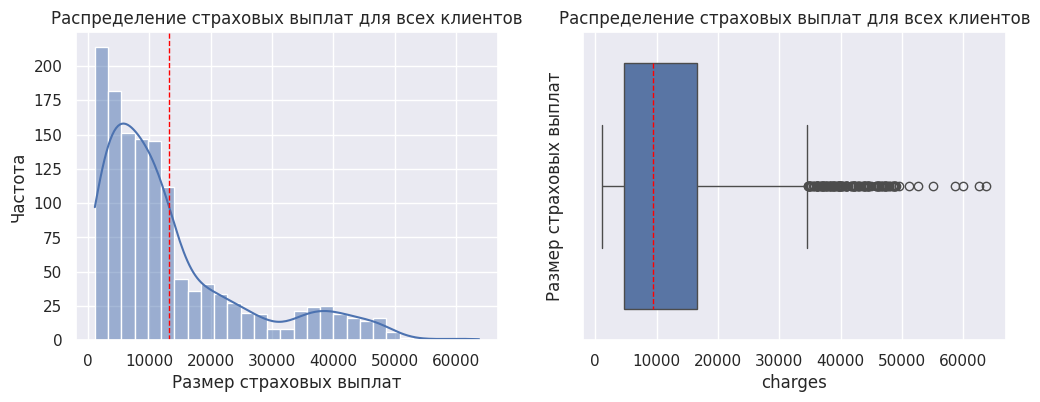

In [109]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data['charges'], kde=True, ax=axes[0])
axes[0].set(xlabel='Размер страховых выплат', ylabel='Частота')
axes[0].set_title('Распределение страховых выплат для всех клиентов')
axes[0].axvline(data['charges'].mean(), color='red', linestyle='--', linewidth=1)

sns.boxplot(data['charges'], ax=axes[1], orient='h', medianprops={"color": "red", "linestyle": '--'})
axes[1].set(ylabel='Размер страховых выплат')
axes[1].set_title('Распределение страховых выплат для всех клиентов')

plt.show()

In [110]:
data1 = data['charges'].describe().round(2).to_frame()
data1.columns = ['Размер страховых выплат']
data1

,Размер страховых выплат
count,1337.00
mean,13279.12
std,12110.36
min,1121.87
25%,4746.34
50%,9386.16
75%,16657.72
max,63770.43


**Выводы:** имеются выбросы.

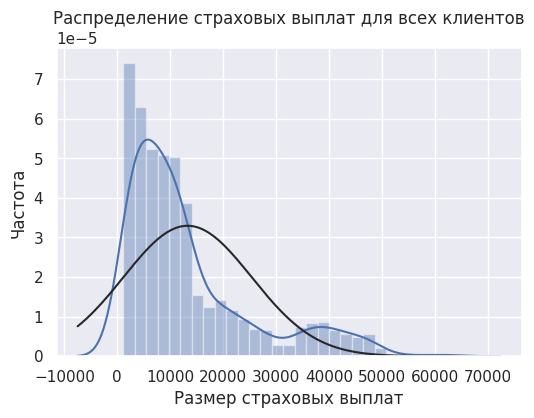

In [111]:
plt.figure(figsize=(6, 4))
sns.distplot(data['charges'], fit=norm)
plt.xlabel('Размер страховых выплат')
plt.ylabel('Частота')
plt.title('Распределение страховых выплат для всех клиентов')
plt.show();


### Q-Q график

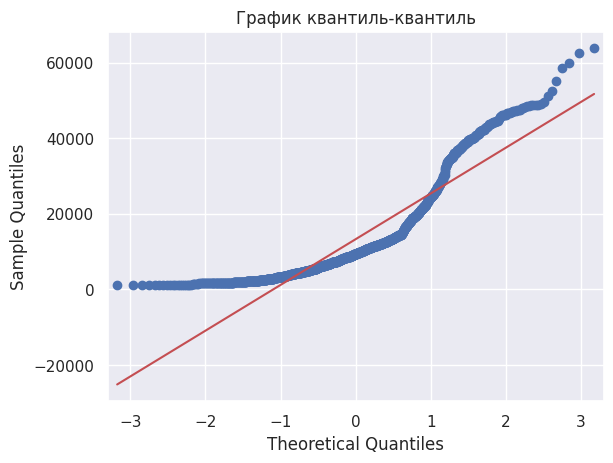

In [112]:
sml.qqplot(data['charges'], line='s')
plt.title('График квантиль-квантиль')
plt.show()

**Выводы:** распределение не нормальное

### 1. Страховые выплаты в зависимости от пола

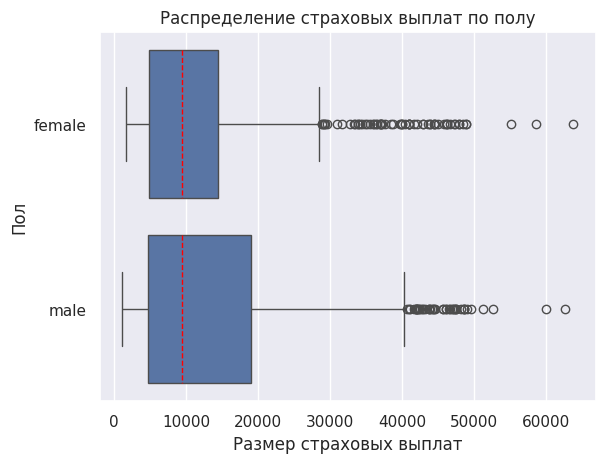

In [113]:
ax = sns.boxplot(data, x='charges', y='sex', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер страховых выплат', ylabel='Пол')
plt.title('Распределение страховых выплат по полу')
plt.show()

In [114]:
data2 = data.groupby('sex')['charges'].describe().round(2)
print('Страховые выплаты в зависимости от пола')
data2

Страховые выплаты в зависимости от пола


,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.58,11128.70,1607.51,4885.16,9412.96,14454.69,63770.43
male,675.0,13975.00,12971.96,1121.87,4654.02,9377.90,19006.69,62592.87


На первый взгляд распределения страховых выплат для разных полов различны.

In [115]:
# функция для принятия решения о нормальности
def decision_normality(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Распределение отлично от нормального'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. Распределение является нормальным'.format(alpha))


# функция для принятия решения об отклонении нулевой гипотезы
def decision_hypothesis(p):
    print('p-value = {:.3f}'.format(p))
    if p <= alpha:
        print('p-значение меньше, чем заданный уровень значимости {:.2f}. Отвергаем нулевую гипотезу в пользу альтернативной.'.format(alpha))
    else:
        print('p-значение больше, чем заданный уровень значимости {:.2f}. У нас нет оснований отвергнуть нулевую гипотезу.'.format(alpha))


**Размер страховых выплат для клиентов-мужчин больше, чем для клиентов-женщин?**

Сформулируем нулевую и альтернативные гипотезы

*Нулевая гипотеза* ($H_0$): размер страховых выплат клиентов-мужчин ($μ_1$) статистически меньше либо равен размеру страховых выплат клиентов-женщин ($μ_2$).

$$ H_0 : μ_1 <= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер страховых выплат клиентов-мужчин ($μ_1$) статистически больше, чем размер страховых выплат клиентов-женщин ($μ_2$).

$$ H_1 : μ_1 > μ_2$$

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально. Напомним гипотезы теста Шапиро-Уилка:

*Нулевая гипотеза* ($H_0$): распределение данные является нормальным.

*Альтернативная гипотеза* ($H_1$): распределение данных отлично от нормального.

In [116]:
# значения страховых выплат
charges_male = data.loc[data['sex']=='male', 'charges']
charges_female = data.loc[data['sex']=='female', 'charges']

# проводим тест Шапиро-Уилка
print('Для мужчин:')
result = stats.shapiro(charges_male)
decision_normality(result[1])

print('Для женщин:')
result = stats.shapiro(charges_female)
decision_normality(result[1])

Для мужчин:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для женщин:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


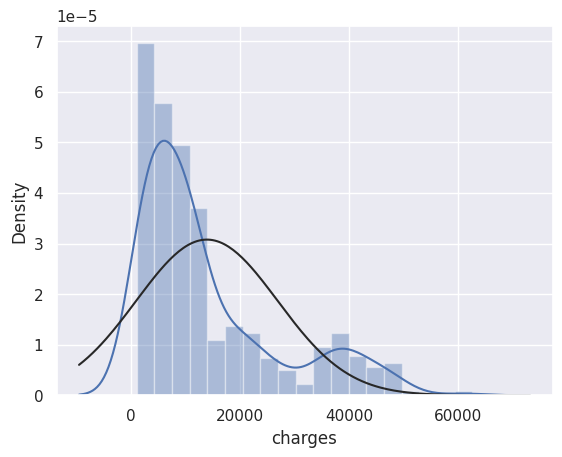

In [117]:
sns.distplot(charges_male, fit=norm);

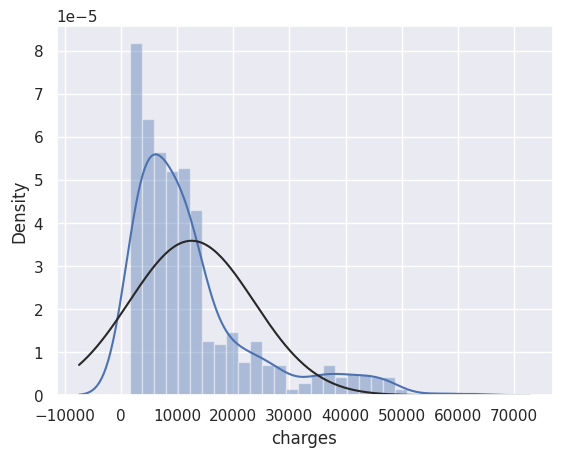

In [118]:
sns.distplot(charges_female, fit=norm);

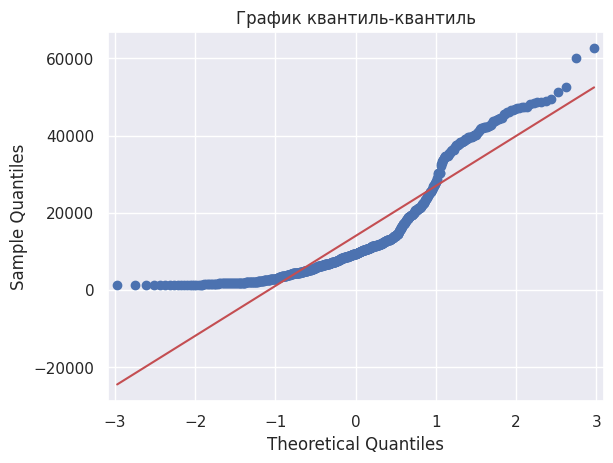

In [119]:
sml.qqplot(charges_male, line='s')
plt.title('График квантиль-квантиль')
plt.show()

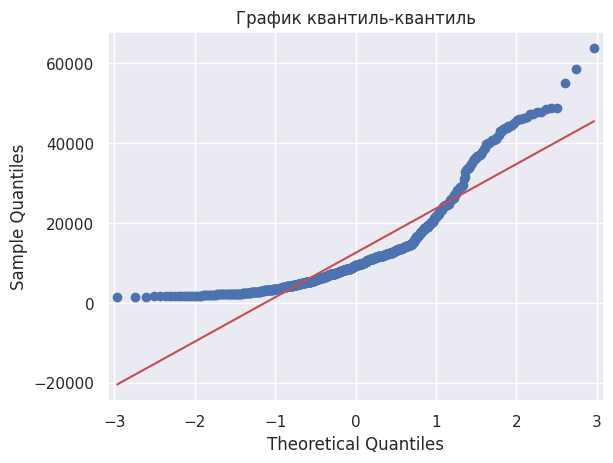

In [120]:
sml.qqplot(charges_female, line='s')
plt.title('График квантиль-квантиль')
plt.show()

**Выводы:** распределения не нормальные

**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер страховых выплат»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Чтобы проверить нашу гипотезу, можно использовать U-критерий Манна — Уитни для сравнения распределений на основе рангов.

**Проведём тест**

In [121]:
# проводим тест
_, p = stats.mannwhitneyu(charges_male, charges_female, alternative='greater')
decision_hypothesis(p)

p-value = 0.347
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

Нет оснований утверждать, что размер страховых выплат для клиентов-мужчин больше, чем для клиентов-женщин.

### 2. Страховые выплаты в зависимости от того, курит ли клиент.

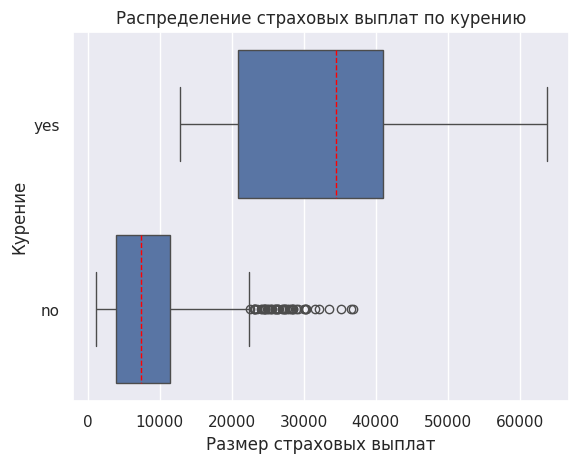

In [122]:
ax = sns.boxplot(data, x='charges', y='smoker', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер страховых выплат', ylabel='Курение')
plt.title('Распределение страховых выплат по курению')
plt.show()

In [123]:
data3 = data.groupby('smoker')['charges'].describe().round(2)
print('Страховые выплаты в зависимости от курения')
data3

Страховые выплаты в зависимости от курения


,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1063.0,8440.66,5992.97,1121.87,3988.88,7345.73,11363.02,36910.61
yes,274.0,32050.23,11541.55,12829.46,20826.24,34456.35,41019.21,63770.43


Выводы: распределения страховых выплат различны в зависимости от того, курит ли клиент.

2. **Размер страховых выплат для некурящих клиентов меньше, чем для курящих?**


Сформулируем нулевую и альтернативные гипотезы

*Нулевая гипотеза* ($H_0$): размер страховых выплат для некурящих клиентов ($μ_1$) статистически больше либо равен размеру страховых выплат для курящих клиентов ($μ_2$).

$$ H_0 : μ_1 >= μ_2$$

*Альтернативная гипотеза* ($H_1$): размер страховых выплат для некурящих клиентов ($μ_1$) статистически меньше, чем размер страховых выплат для курящих клиентов ($μ_2$).
$$ H_1 : μ_1 < μ_2$$




**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [124]:
# значения страховых выплат
charges_no_smoker = data.loc[data['smoker']=='no', 'charges']
charges_smoker = data.loc[data['smoker']=='yes', 'charges']

# проводим тест Шапиро-Уилка
print('Для некурящих клиентов:')
result = stats.shapiro(charges_no_smoker)
decision_normality(result[1])

print('Для курящих клиентов:')
result = stats.shapiro(charges_smoker)
decision_normality(result[1])

Для некурящих клиентов:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для курящих клиентов:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Размер страховых выплат»? — Количественный.
* Сколько сравниваемых групп? — Две.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Для проверки нашей гипотезы можно использовать U-критерий Манна — Уитни.

**Проведём тест**


In [125]:
# проводим тест
_, p = stats.mannwhitneyu(charges_no_smoker, charges_smoker, alternative='less')
decision_hypothesis(p)

p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Размер страховых выплат для некурящих клиентов меньше, чем для курящих.

### 3. Страховые выплаты в зависимости от региона

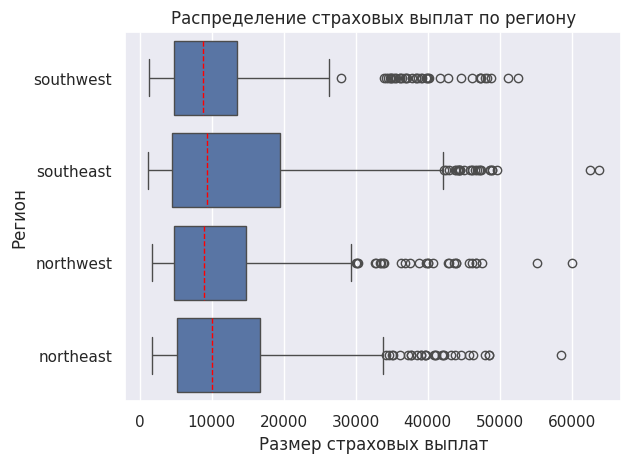

In [126]:
ax = sns.boxplot(data, x='charges', y='region', orient='h', medianprops={"color": "red", "linestyle": '--'})
ax.set(xlabel='Размер страховых выплат', ylabel='Регион')
plt.title('Распределение страховых выплат по региону')
plt.show()

In [127]:
data_agg = data.groupby('region')['charges'].describe().round(2)
print('Страховые выплаты в зависимости от региона')
data_agg

Страховые выплаты в зависимости от региона


,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.38,11255.80,1694.80,5194.32,10057.65,16687.36,58571.07
northwest,324.0,12450.84,11073.13,1621.34,4733.64,8976.98,14788.75,60021.40
southeast,364.0,14735.41,13971.10,1121.87,4440.89,9294.13,19526.29,63770.43
southwest,325.0,12346.94,11557.18,1241.56,4751.07,8798.59,13462.52,52590.83


Распределения страховых выплат различны для разных регионов. Чтобы определить, являются ли эти различия статистически значимыми, проведём статистические тесты.

**Проверка на нормальность**

С помощью теста Шапиро-Уилка проверим, распределён ли признак нормально.

In [128]:
# значения страховых выплат
charges_northeast = data.loc[data['region']=='northeast', 'charges']
charges_southeast = data.loc[data['region']=='southeast', 'charges']
charges_northwest = data.loc[data['region']=='northwest', 'charges']
charges_southwest = data.loc[data['region']=='southwest', 'charges']

# проводим тест Шапиро-Уилка
print('Для северо-востока:')
result = stats.shapiro(charges_northeast)
decision_normality(result[1])

print('Для юго-востока:')
result = stats.shapiro(charges_southeast)
decision_normality(result[1])

print('Для северо-запада:')
result = stats.shapiro(charges_northwest)
decision_normality(result[1])

print('Для юго-запада:')
result = stats.shapiro(charges_southwest)
decision_normality(result[1])


Для северо-востока:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для юго-востока:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для северо-запада:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального
Для юго-запада:
p-value = 0.000
p-значение меньше, чем заданный уровень значимости 0.05. Распределение отлично от нормального


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Регион проживания в США»? — Количественный.
* Сколько сравниваемых групп? — Четыре.
* Группы зависимы? — Нет.
* Признак распределён по нормальному закону? — Нет.

Для проверки нашей гипотезы можно использовать критерий Краскела — Уоллиса.

**Проведём тест**

In [129]:
# проводим тест
_, p = stats.kruskal(charges_northeast, charges_southeast, charges_southwest, charges_northwest)
decision_hypothesis(p)

p-value = 0.202
p-значение больше, чем заданный уровень значимости 0.05. У нас нет оснований отвергнуть нулевую гипотезу.


**Вывод**

Нет оснований утверждать, что есть разница в размере страховых выплат в разных регионах.

### 4. Соотношение курящих среди мужчин и женщин

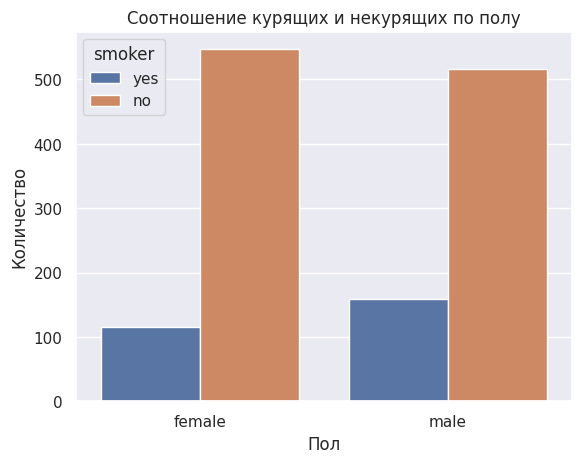

In [130]:
ax = sns.countplot(data=data, x=data['sex'], hue='smoker')
ax.set(xlabel='Пол', ylabel='Количество')
plt.title('Соотношение курящих и некурящих по полу')
plt.show()

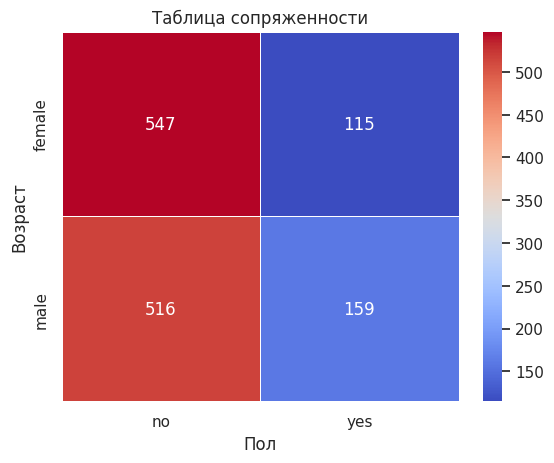

In [131]:
cross_tab = pd.crosstab(index=data['sex'], columns=data['smoker'])
ax = sns.heatmap(cross_tab, annot=True, linewidth=.5, fmt='.0f', cmap="coolwarm")
ax.set(xlabel='Пол', ylabel='Возраст')
plt.title('Таблица сопряженности')
plt.show()

Согласно данным, среди курящих мужчин больше, чем женщин. Чтобы определить, являются ли эти различия статистически значимыми, проведём статистические тесты.

**Есть ли взаимосвязь между курением и полом?**

**Сформулируем нулевую и альтернативные гипотезы**

*Нулевая гипотеза*: между тем, курит человек или нет, и его полом нет взаимосвязи (признаки независимы).

*Альтернативная гипотеза*: между тем, курит человек или нет, и его полом есть взаимосвязь (признаки зависимы).


**Выберем подходящий статистический тест**

Для выбора нужного теста воспользуемся алгоритмом выбора теста. Для этого ответим на следующие вопросы:
* Какой тип у признака «Пол»? — Категориальный.
* Сколько сравниваемых групп? — Две.
* Проверяется независимость групп? — Да.

Для проверки нашей гипотезы можно использовать критерий ${\chi}^2$ (хи-квадрат).

**Проведём тест**

In [132]:
# составляем таблицу сопряжённости
cross_table = pd.crosstab(data['sex'], data['smoker'])

cross_table

smoker,no,yes
sex,,
female,547,115
male,516,159


In [133]:
# проводим тест
_, p, _, _ = stats.chi2_contingency(cross_table)
decision_hypothesis(p)

p-value = 0.006
p-значение меньше, чем заданный уровень значимости 0.05. Отвергаем нулевую гипотезу в пользу альтернативной.


**Вывод**

Существует статистически значимая взаимосвязь между полом и курением.

## Итоговые результаты исследования

*   Нет оснований утверждать, что есть разница в размере страховых выплат для клиентов-мужчин и клиентов-женщин.
*   Размер страховых выплат для некурящих клиентов меньше, чем для курящих.
*   Нет оснований утверждать, что есть разница в размере страховых выплат для разных регионов.
*   Существует взаимосвязь между полом и курением.